In [20]:
import os, sys, subprocess
import string
letters = string.ascii_lowercase
import matplotlib.pyplot as plt
import numpy as np
import re

In [21]:
wordfile = open("words_alpha.txt")
all_words = wordfile.readlines()

In [22]:
def remove_newline(x):
    return x.replace('\n','')

all_words = list(map(remove_newline, all_words))

In [23]:
five_letter_words = sorted(list(set([w.lower() for w in all_words if len(w)==5 and w.isalpha()])))

In [24]:
NW =  len(five_letter_words)
print("Number of five letter words: ",NW)

Number of five letter words:  15918


In [25]:
Letter_Freqs = {}
# Letter positions 1-5 represent the letters being in position 1-5 in the word. 0 means position agnostic
for pos in range(6):
    Letter_Freqs[pos] = {}
    for letter in letters:
        Letter_Freqs[pos][letter] = 0

for word in five_letter_words:
    for ii, letter in enumerate(word):
        Letter_Freqs[ii+1][letter] += 1

for letter in letters:
    for pos in range(1,6):
        Letter_Freqs[0][letter] += Letter_Freqs[pos][letter]

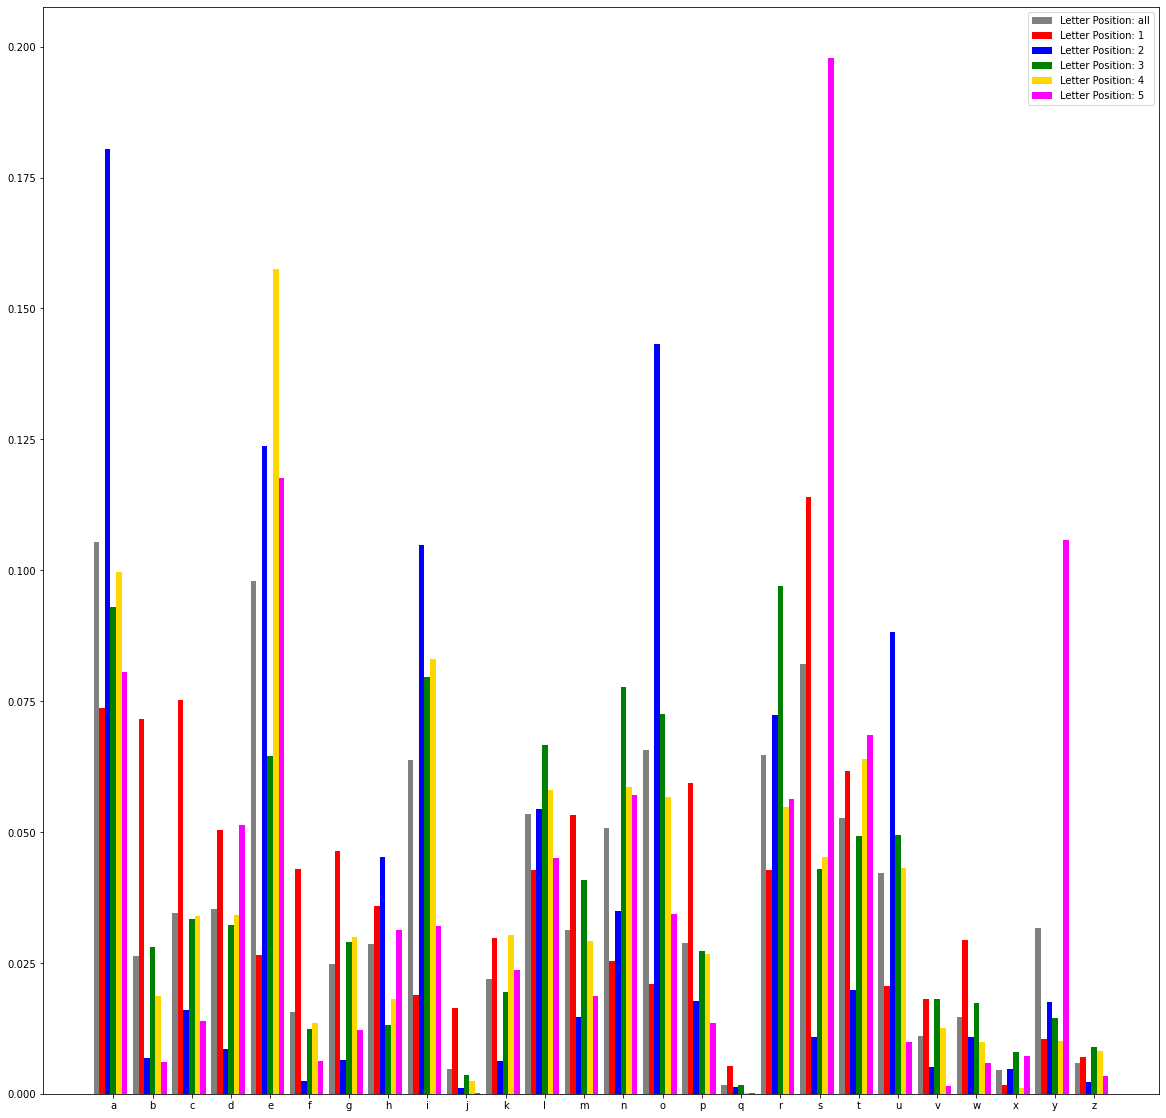

In [26]:
width = 1
colors = ["gray", "red", "blue", "green", "gold", "magenta"]
plt.figure(figsize=(20,20))
ind = np.arange(26)
for pos in range(6):
    these_freqs = []
    for letter in letters:
        these_freqs.append(Letter_Freqs[pos][letter])
    plt.bar((ind*7 + pos)*width, 
            np.array(these_freqs)/np.sum(these_freqs), 
            width,
            label = "Letter Position: {}".format("all" if pos == 0 else pos),
            color = colors[pos],
           )
plt.xticks((ind*7 + 3)*width, list(letters))
plt.legend()
plt.show()
    

In [27]:
def wordle_score(target, attempt, debug = False):
    if attempt == target:
        return 10
    score = 0
    
    matched_indices = [-1]*5     
    full_matched_indices = []
    full_matched_letters = []
    part_matched_indices = []
    part_matched_letters = []
    for idx, l_a in enumerate(attempt):
        #print(l_a)
        if target[idx] == l_a:
            score += 2
            matched_indices[idx] = idx
            full_matched_indices.append(idx)
            full_matched_letters.append(l_a)

    for idx, l_a in enumerate(attempt):
        #print(l_a)
        if l_a in target and idx not in full_matched_indices:
            indices = [i.start() for i in re.finditer(l_a, target)]
            for t_index in indices:
                #if t_index not in part_matched_indices + full_matched_indices:
                if t_index not in matched_indices:
                    part_matched_indices.append(t_index)
                    part_matched_letters.append(l_a)
                    matched_indices[idx] = t_index
                    score += 1
                    break
    if debug: 
        print(matched_indices)
            
    return score

In [28]:
wordle_score(target = 'trust', attempt = 'issue', debug = True)

[-1, 3, -1, 2, -1]


2

In [29]:
Score_Array = np.zeros((NW,NW))

for ii in range(NW):
    for jj in range(ii+1,NW):
        Score_Array[ii,jj] = wordle_score(five_letter_words[ii], five_letter_words[jj])

In [30]:
Score_Sums = np.sum(Score_Array, axis = 1)
indices = np.where(Score_Sums == max(Score_Sums))
indices = list(np.array(indices).reshape(-1))

print("Best First guess should be: **" + five_letter_words[indices[0]].upper() + "**")

Best First guess should be: **AEONS**
